# Machine Learning (Only Source Code Features)

## Modules and functions

Import all the modules:

In [1]:
import pandas as pd

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

from notebooks import *

## Loading

In [2]:
df_file_path = "dataset-filtered.csv"
df = pd.read_csv(df_file_path, low_memory=False)

In [3]:
print_dimensions(df)

The dataset has 158863 rows and 434 columns


## Prepare data

In [4]:
addresses, X, y_binary, y_multi, scaler, feature_names = extract_experiment_data(df, ["source code"])

Scaled columns:
contract_compiler_runs: [0, 330000000]
contract_num_source_code_lines: [1, 11409]

Extracted values:
addresses (158863,)
features (158863, 337)
labels_binary (158863,)
labels_multi (158863,)


In [5]:
for feature_name in feature_names:
    print(feature_name)

contract_compiler_runs
contract_num_source_code_lines
contract_has_library
contract_compiler_minor_version_0
contract_compiler_minor_version_1
contract_compiler_minor_version_2
contract_compiler_minor_version_3
contract_compiler_patch_0
contract_compiler_patch_1
contract_compiler_patch_2
contract_compiler_patch_3
contract_compiler_patch_4
contract_compiler_patch_5
contract_compiler_patch_6
contract_compiler_patch_7
contract_compiler_patch_8
contract_compiler_patch_9
contract_compiler_patch_10
contract_compiler_patch_11
contract_compiler_patch_12
contract_compiler_patch_13
contract_compiler_patch_14
contract_compiler_patch_15
contract_compiler_patch_16
contract_compiler_patch_17
contract_compiler_patch_18
contract_compiler_patch_19
contract_compiler_patch_20
contract_compiler_patch_21
contract_compiler_patch_22
contract_compiler_patch_23
contract_compiler_patch_24
contract_compiler_patch_25
contract_compiler_patch_26
contract_compiler_patch_27
contract_compiler_patch_28
contract_compile

## Classification

In [6]:
xgb_scale_pos_weight = compute_scale_pos_weight(y_binary)

In [7]:
def create_xgb_model():
    return XGBClassifier(n_jobs=10,
                         scale_pos_weight=xgb_scale_pos_weight,
                         n_estimators=25,
                         max_depth=3)

In [8]:
xgb_models = train_test_folds(X,
                              y_binary,
                              k_fold(X, n_splits=10),
                              create_xgb_model)

train ROC AUC 0.953 TN  131918 FP  10791 FN     5 TP   262
test  ROC AUC 0.945 TN  14674 FP  1185 FN     1 TP    27
train score - test score = 0.008

train ROC AUC 0.957 TN  132104 FP  10610 FN     3 TP   259
test  ROC AUC 0.930 TN  14581 FP  1273 FN     2 TP    31
train score - test score = 0.028

train ROC AUC 0.952 TN  131197 FP  11510 FN     4 TP   265
test  ROC AUC 0.960 TN  14590 FP  1271 FN     0 TP    26
train score - test score = -0.008

train ROC AUC 0.953 TN  130901 FP  11801 FN     3 TP   272
test  ROC AUC 0.933 TN  14540 FP  1326 FN     1 TP    19
train score - test score = 0.020

train ROC AUC 0.952 TN  131181 FP  11533 FN     4 TP   259
test  ROC AUC 0.962 TN  14650 FP  1204 FN     0 TP    32
train score - test score = -0.010

train ROC AUC 0.951 TN  131353 FP  11356 FN     5 TP   263
test  ROC AUC 0.962 TN  14639 FP  1220 FN     0 TP    27
train score - test score = -0.011

train ROC AUC 0.956 TN  131842 FP  10872 FN     3 TP   260
test  ROC AUC 0.930 TN  14638 FP  1216

In [9]:
feature_importance = compute_average_feature_importance(X, xgb_models)

In [10]:
display(create_feature_importance_table(feature_names, feature_importance, size=10))

,Feature,Importance
0,contract_num_source_code_lines,0.414835
1,contract_compiler_patch_136,0.124429
2,contract_compiler_patch_138,0.073814
3,contract_compiler_patch_125,0.071320
4,contract_compiler_patch_137,0.061064
5,contract_compiler_patch_245,0.048930
6,contract_compiler_minor_version_0,0.048469
7,contract_compiler_patch_0,0.038724
8,contract_compiler_patch_90,0.029245
9,contract_compiler_patch_115,0.022444


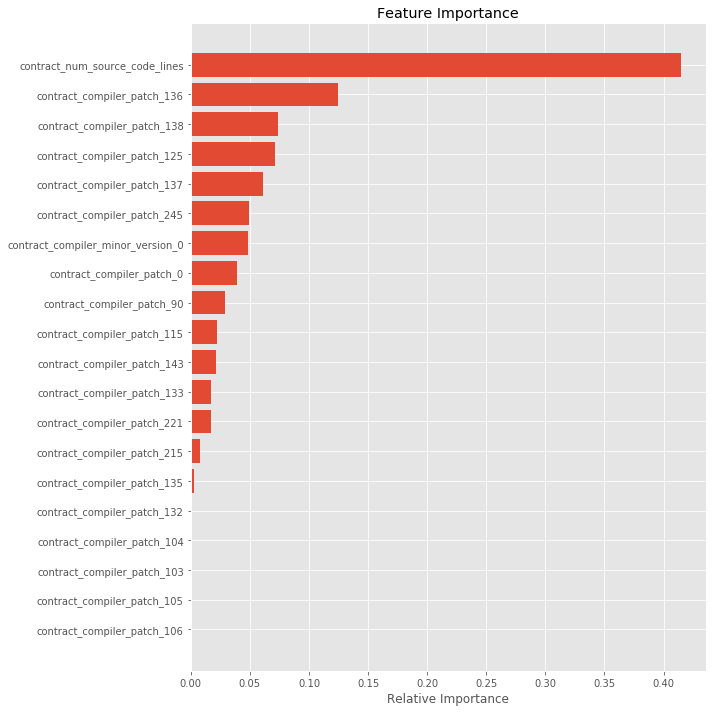

In [11]:
plot_feature_importance(feature_names, feature_importance)